In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
N = 25
X = np.reshape(np.linspace(0, 0.9, N), (N,1))
Y = np.cos(10*X**2) + 0.1* np.sin(100*X)

In [4]:
def getPhi(feature, order):
    phi = np.zeros((feature.shape[0], order + 1))
    for i in range(feature.shape[0]):
        for j in range(0, order + 1):
            phi[i][j] = np.power(feature[i], j)
    return phi

In [5]:
def Drawlines(order, min, max):
    phi = getPhi(X, order)
    theta = np.linalg.inv(phi.T.dot(phi)).dot(phi.T).dot(Y)
    x = np.linspace(min, max, 200)
    phi = getPhi(x, order)
    y = np.matmul(phi, theta)
    plt.plot(x, y, label='order ' + str(order))

    plt.ylim(-1.5, 2.2)
    plt.xlabel('x')
    plt.ylabel('y')

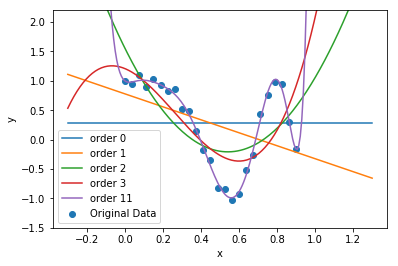

In [6]:
min = -0.3
max = 1.3
for i in (0,1,2,3,11):
    Drawlines(i, min, max)
plt.scatter(X,Y, label = 'Original Data')
plt.legend(loc='lower left')
plt.show()

In [7]:
def getPhi2(feature, order):
    phi = np.ones((feature.shape[0], 2*order+1))
    for i in range(feature.shape[0]):
        for j in range(1, order+1):
            a = 2 * np.pi * j * feature[i]
            phi[i][2*j -1] = np.sin(a)
            phi[i][2*j] = np.cos(a)
    return phi



In [8]:
def Drawlines2(order, min, max):
    phi = getPhi2(X, order)
    theta = np.linalg.inv(phi.T.dot(phi)).dot(phi.T).dot(Y)
    x = np.linspace(min, max, 200)
    phi = getPhi2(x, order)
    y = np.matmul(phi, theta)
    plt.plot(x, y, label='order ' + str(order))

    plt.ylim(-2, 2)
    plt.xlabel('x')
    plt.ylabel('y')

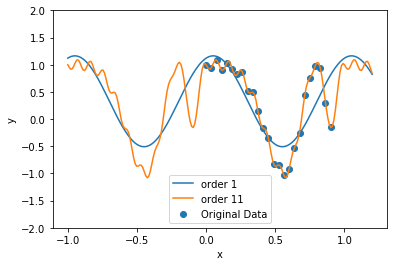

In [9]:
min = -1
max = 1.2
for i in (1,11):
    Drawlines2(i, min, max)
plt.scatter(X,Y, label = 'Original Data')
plt.legend(loc='lower center')
plt.show()

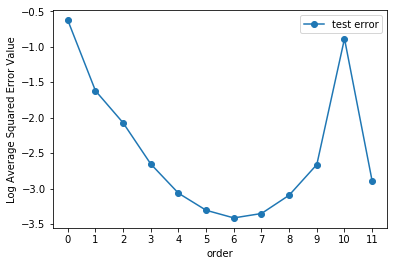

In [12]:
MSE_order = np.zeros(12)
MSE_order1 = np.zeros(12)
for order in range(12):
    sum = np.array([0.0])
    sum1 = np.array([0.0])
    for i in range(N):
        phi = getPhi2(X, order)
        test_X = phi[i]
        test_Y = Y[i]
        train_X = np.delete(phi, i, axis=0)
        train_Y = np.delete(Y, i, axis=0)
        theta = np.linalg.inv(train_X.T.dot(train_X)).dot(train_X.T).dot(train_Y)
        predict = np.matmul(test_X, theta)
        predict1 = np.matmul(train_X, theta)
        sum +=np.power(test_Y-predict,2)
        sum1 += np.mean(np.power(train_Y - predict1,2))
    MSE= sum/25
    MSE1 = sum1/25
    MSE_order[order] = np.log(MSE)
    MSE_order1[order] = MSE1
order = np.arange(0,12)
plt.plot(order, MSE_order, marker = 'o', label = 'test error')
#plt.plot(order, MSE_order1, marker = 'x', label = 'training error')
plt.legend(loc='upper right')
plt.xticks(order)
plt.xlabel('order')
plt.ylabel('Log Average Squared Error Value')
plt.show()

In [59]:
def getPhi3(feature, num, scale, means):
    phi = np.ones((feature.shape[0], num+1))
    for i in range(feature.shape[0]):
        for j in range(1, num+1):
            phi[i][j] = np.exp(-np.power(feature[i]-means[j-1], 2)/(2*scale*scale))
    return phi



def DrawLines_lambda(regularizer, scale, means):
    phi = getPhi3(X, 20, scale, means)
    theta = np.linalg.inv(phi.T.dot(phi) + regularizer * np.identity(21)).dot(phi.T).dot(Y)
    x = np.linspace(-0.3, 1.3, 100)
    phi = getPhi3(x, 20, scale, means)
    y = np.matmul(phi, theta)
    plt.plot(x, y, label='lambda = '+str(regularizer))
    # plt.legend(loc='upper right')
    plt.ylim(-3, 3)


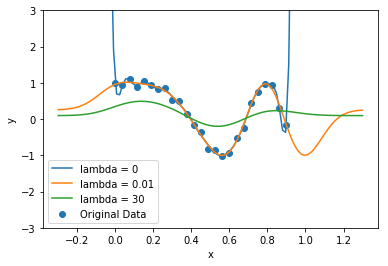

In [62]:
scale = 0.1
means = np.linspace(0.0, 1.0 ,num=20)
DrawLines_lambda(0,scale, means)
DrawLines_lambda(0.01,scale, means)
DrawLines_lambda(30,scale, means)
plt.scatter(X,Y,label='Original Data')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()